In [1]:
#print("hello world")
FEATURES_PATH = 'DEAM/features'
VALENCE_FILE = 'DEAM/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv'
GENRE_FILE = 'DEAM/metadata/metadata_2013.csv'

NUMBER_FILES = 2000

import csv
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
def loadFeaturesFromFile (file_name):
    features_values = []
    with open('DEAM/features/' + file_name, newline='') as csvfile:
        data = list(csv.reader(csvfile, delimiter=';'))
    for i in range (1, len(data[1])):
        media = 0.0
        suma = 0.0
        #print(data[0][i], end="" + " = ")
        for j in range (1, len(data)):
            #print(str(float(data[j][i]))+ ", ", end="")  
            suma += float((data[j][i]))
            #suma = suma + float((data[j][i]))
            media = suma / (len(data) - 1)
        #print(media)
        #print("")
        features_values.append(media)
    return features_values
    #print(features_values)
#loadFeaturesFromFile('2.csv')


Extracción de nombre de las caracterísiticas

In [3]:
def extractFeaturesNames():
    with open('DEAM/features/2.csv', newline='') as csvfile:
        data = list(csv.reader(csvfile, delimiter=';'))
    features = data[0]
    features = features[1:]
    #print(len(features))
    #print(features)
    return features

features = extractFeaturesNames()

Crear tabla con las características por cancion y los datos de valencia

In [43]:
def createDataFile(file_data, files_number):
    
    # create the header of the matrix (features and values of 2 file)
    columns_name = ['file'] + features + ['valence'] + ['arousal']
    df = pd.DataFrame([], columns=columns_name)
    df.to_csv(file_data + ".csv")
    
    # extract the name of the files
    features_files = os.listdir(FEATURES_PATH)

    #extract valence values from files
    valence_matrix = pd.read_csv(VALENCE_FILE)
    valences = valence_matrix[['song_id', ' valence_mean', ' arousal_mean']]
    
    
    # fill the matrix with data
    num = 1
    song_id = 0
    for file in features_files:
        song_id = int(file[:-4])
    
        if song_id <= 1999:
            valence_for_song = (valences[valences['song_id'] == song_id][' valence_mean']).iloc[0] 
            arousal_for_song = (valences[valences['song_id'] == song_id][' arousal_mean']).iloc[0] 
            feat = [num] + [file] + loadFeaturesFromFile(file) + [valence_for_song] + [arousal_for_song]
            
            with open(file_data + '.csv', mode='a', newline='') as file:  
                writer = csv.writer(file)
                writer.writerow(feat)
            num = num + 1




createDataFile('recap_data', NUMBER_FILES)

    

Carga de datos

In [4]:
matrix = pd.read_csv('recap_data.csv')
matrix

,Unnamed: 0,file,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,jitterLocal_sma_stddev,jitterLocal_sma_amean,jitterDDP_sma_stddev,jitterDDP_sma_amean,...,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean,valence,arousal
0,1,122.csv,72.455493,121.999593,0.032615,0.743192,0.121745,0.078061,0.133986,0.088676,...,2.132022,-0.000408,1.971246,0.000047,1.848157,0.000444,1.709386,0.000424,5.5,4.6
1,2,736.csv,55.493567,174.128629,0.032542,0.785903,0.072172,0.051077,0.085079,0.053610,...,1.336499,0.000298,1.217145,-0.000021,1.238022,0.000212,1.116202,0.000100,2.7,3.7
2,3,1042.csv,39.409995,106.558921,0.037863,0.772938,0.127640,0.094258,0.143104,0.103178,...,2.221844,-0.003346,2.156892,-0.000577,2.053561,0.001272,1.702499,0.001127,5.0,4.3
3,4,1275.csv,22.590408,82.188975,0.033827,0.763277,0.104742,0.072661,0.103858,0.071290,...,2.215059,-0.001149,1.937555,0.003023,1.802331,-0.000547,1.680737,-0.001378,3.5,2.8
4,5,1892.csv,65.854057,113.440481,0.029411,0.743594,0.107730,0.075472,0.112885,0.078096,...,2.329009,-0.000771,2.004704,-0.001736,1.909060,0.001739,1.753582,-0.001443,5.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,1739,357.csv,44.839563,111.343268,0.036957,0.768153,0.113309,0.070202,0.123682,0.076547,...,1.955979,0.000230,1.812231,0.000394,1.671897,-0.000347,1.513882,-0.000573,4.8,6.5
1739,1740,1648.csv,55.258397,141.024205,0.027661,0.798257,0.135815,0.084960,0.159669,0.101305,...,1.945865,-0.002976,1.697553,-0.004987,1.501074,-0.002797,1.444453,-0.005020,3.9,2.5
1740,1741,1493.csv,157.875615,412.318588,0.084103,0.806587,0.038528,0.023111,0.036928,0.019565,...,4.364806,0.000448,3.410945,0.006046,2.564815,-0.000453,2.606689,-0.003860,4.0,6.1
1741,1742,1784.csv,64.431062,108.279179,0.070644,0.758823,0.124175,0.075927,0.142210,0.090704,...,2.248901,-0.004967,1.913097,0.001232,2.023299,0.002849,1.714624,0.000608,5.5,5.1


Seleccionar variables

In [5]:
explicative = matrix.drop(columns=['valence', 'file', 'Unnamed: 0', 'arousal'])
objective_valence = matrix.valence
objective_arousal = matrix.arousal


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x749e0a8013a0>
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

,MAE,MSE,R2,RMSLE,MAPE
Decission Tree Regressor,0.841848,1.163597,0.104391,0.033407,0.176916
Linear Regression,0.691462,0.720338,0.445563,0.021412,0.146273
KNN,0.983962,1.568538,-0.207288,0.048029,0.217489


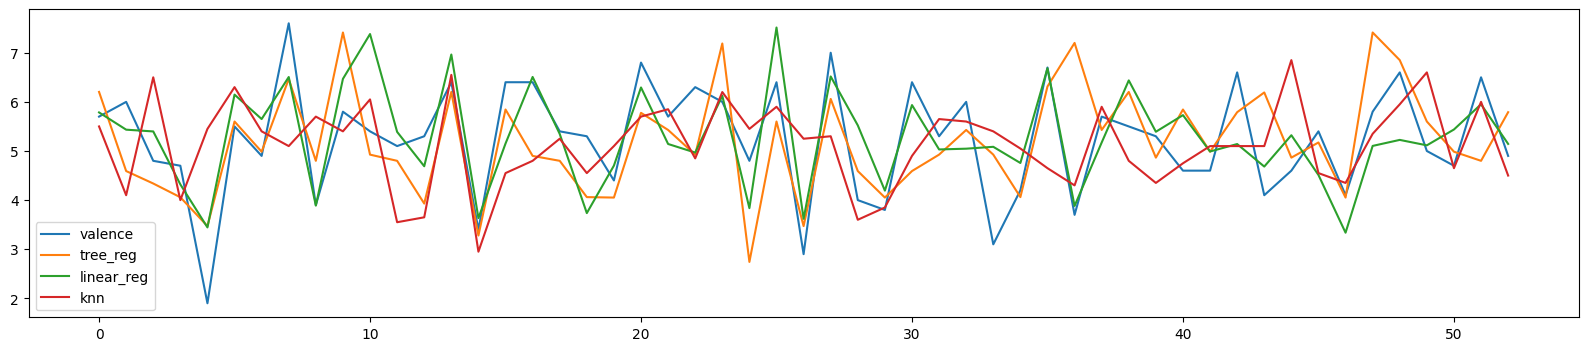

In [13]:
########## VALENCE ##########

# ----- seleccion de variables
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(explicative, objective_valence, test_size=0.03, random_state=42)

# ------ inicializacion matriz de comparación
compare_valence = pd.DataFrame(y_test_val)

# --- árbol de decisión
from sklearn.tree import DecisionTreeRegressor
tree_regr_model_valence = DecisionTreeRegressor(max_depth = 7)
tree_regr_model_valence.fit(X=X_train_val, y=y_train_val)
pred_tree_regr_model_valence = tree_regr_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence.reset_index(), pd.DataFrame(pred_tree_regr_model_valence, columns=['tree_reg'])],
                            axis = 1,
                            ignore_index=False)


# ------ regresion linear
from sklearn.linear_model import LinearRegression
reg_linnear_model_valence = LinearRegression().fit(X=X_train_val, y=y_train_val)
pred_linear_model_valence = reg_linnear_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence, pd.DataFrame(pred_linear_model_valence, columns=['linear_reg'])],
                            axis = 1,
                            ignore_index=False)

# ------ regresion knn
from sklearn.neighbors import KNeighborsRegressor
knn_model_valence = KNeighborsRegressor(n_neighbors=2)
knn_model_valence.fit(X=X_train_val, y=y_train_val)
pred_knn_model_valence = knn_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence, pd.DataFrame(pred_knn_model_valence, columns=['knn'])],
                            axis = 1,
                            ignore_index=False)


#print(compare_valence)
compare_valence.drop(columns=['index']).plot(figsize=(20,4));

#### ------ métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# valor cuadrático medio (MAE)
mae_tree_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['tree_reg'])
mae_linear_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['linear_reg'])
mae_knn_valence = mean_absolute_error(compare_valence['valence'], compare_valence['knn'])

# valor cuadrático medio (MSE)
mse_tree_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['tree_reg'])
mse_linear_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['linear_reg'])
mse_knn_valence = mean_squared_error(compare_valence['valence'], compare_valence['knn'])

# r2
r2_tree_reg_valence = r2_score(compare_valence['valence'], compare_valence['tree_reg'])
r2_linear_reg_valence = r2_score(compare_valence['valence'], compare_valence['linear_reg'])
r2_knn_valence = r2_score(compare_valence['valence'], compare_valence['knn'])

# mean squared log error (RMSLE)
rmsle_tree_reg_valence = mean_squared_log_error(compare_valence['valence'], compare_valence['tree_reg'])
rmsle_linear_reg_valence = mean_squared_log_error(compare_valence['valence'], compare_valence['linear_reg'])
rmsle_knn_valence = mean_squared_log_error(compare_valence['valence'], compare_valence['knn'])

# mean absolute percentage error (MAPE)
mape_tree_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['tree_reg'])
mape_linear_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['linear_reg'])
mape_knn_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['knn'])


metrics_valence = pd.DataFrame([[mae_tree_reg_valence, mse_tree_reg_valence, r2_tree_reg_valence, rmsle_tree_reg_valence, mape_tree_reg_valence],
                                [mae_linear_reg_valence, mse_linear_reg_valence, r2_linear_reg_valence, rmsle_linear_reg_valence, mape_linear_reg_valence],
                                [mae_knn_valence, mse_knn_valence, r2_knn_valence, rmsle_knn_valence, mape_knn_valence]], 
                               columns=['MAE', 'MSE', 'R2', 'RMSLE', 'MAPE'], 
                               index=['Decission Tree Regressor', 'Linear Regression', 'KNN'])
metrics_valence

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x749e0a69a340>
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

,MAE,MSE,R2,RMSLE,MAPE
Decission Tree Regressor,0.875090,1.392852,0.143148,0.039754,0.190722
Linear Regression,0.866971,1.136737,0.300704,0.033404,0.184889
KNN,0.956038,1.314545,0.191320,0.043224,0.212299


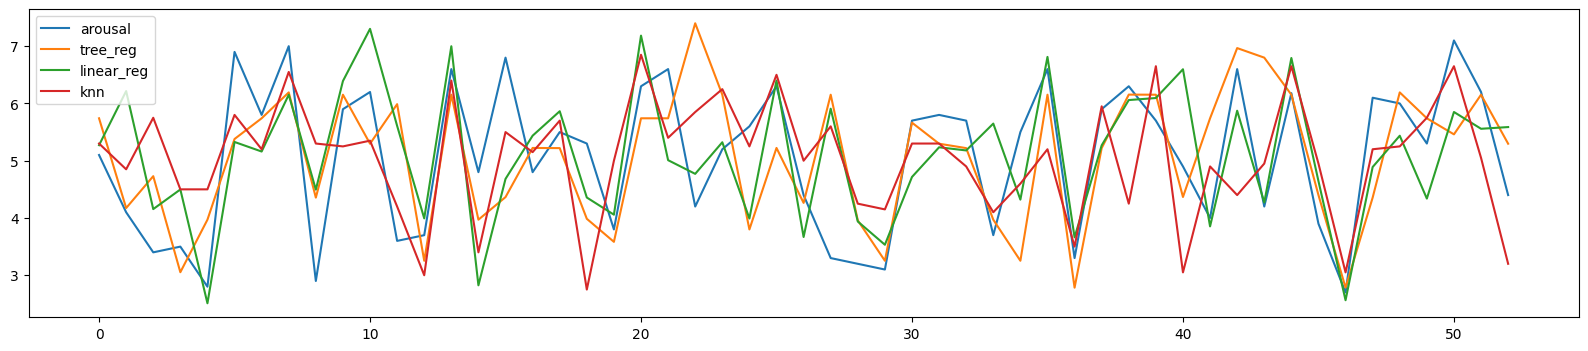

In [14]:
########## AROUSAL ##########

# ----- seleccion de variables
from sklearn.model_selection import train_test_split
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(explicative, objective_arousal, test_size=0.03, random_state=42)

# ------ inicializacion matriz de comparación
compare_arousal = pd.DataFrame(y_test_ar)

# --- árbol de decisión
from sklearn.tree import DecisionTreeRegressor
tree_regr_model_arousal = DecisionTreeRegressor(max_depth = 7)
tree_regr_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_tree_regr_model_arousal = tree_regr_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal.reset_index(), pd.DataFrame(pred_tree_regr_model_arousal, columns=['tree_reg'])],
                            axis = 1,
                            ignore_index=False)


# ------ regresion linear
from sklearn.linear_model import LinearRegression
reg_linnear_model_arousal = LinearRegression().fit(X=X_train_ar, y=y_train_ar)
pred_linear_model_arousal = reg_linnear_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal, pd.DataFrame(pred_linear_model_arousal, columns=['linear_reg'])],
                            axis = 1,
                            ignore_index=False)

# ------ regresion knn
from sklearn.neighbors import KNeighborsRegressor
knn_model_arousal = KNeighborsRegressor(n_neighbors=2)
knn_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_knn_model_arousal = knn_model_arousal.predict(X_test_val)
compare_arousal = pd.concat([compare_arousal, pd.DataFrame(pred_knn_model_arousal, columns=['knn'])],
                            axis = 1,
                            ignore_index=False)

compare_arousal

compare_arousal.drop(columns=['index']).plot(figsize=(20,4));

#### ------ métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# valor cuadrático medio (MAE)
mae_tree_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mae_linear_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mae_knn_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['knn'])

# valor cuadrático medio (MSE)
mse_tree_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mse_linear_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mse_knn_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['knn'])

# r2
r2_tree_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['tree_reg'])
r2_linear_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['linear_reg'])
r2_knn_arousal = r2_score(compare_arousal['arousal'], compare_arousal['knn'])

# mean squared log error (RMSLE)
rmsle_tree_reg_arousal = mean_squared_log_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
rmsle_linear_reg_arousal = mean_squared_log_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
rmsle_knn_arousal = mean_squared_log_error(compare_arousal['arousal'], compare_arousal['knn'])

# mean absolute percentage error (MAPE)
mape_tree_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mape_linear_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mape_knn_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['knn'])


metrics_arousal = pd.DataFrame([[mae_tree_reg_arousal, mse_tree_reg_arousal, r2_tree_reg_arousal, rmsle_tree_reg_arousal, mape_tree_reg_arousal],
                                [mae_linear_reg_arousal, mse_linear_reg_arousal, r2_linear_reg_arousal, rmsle_linear_reg_arousal, mape_linear_reg_arousal],
                                [mae_knn_arousal, mse_knn_arousal, r2_knn_arousal, rmsle_knn_arousal, mape_knn_arousal]], 
                               columns=['MAE', 'MSE', 'R2', 'RMSLE', 'MAPE'], 
                               index=['Decission Tree Regressor', 'Linear Regression', 'KNN'])
metrics_arousal

////////////////////////////////////////////////////////////////////////////////////////////////////////////
RELACIÓN EMOCIÓN CON ESTILO MUSICAL
////////////////////////////////////////////////////////////////////////////////////////////////////////////

Recopilación de datos

In [19]:
#extract valence and arousal values from files
emotion_matrix = pd.read_csv(VALENCE_FILE)
emotion = emotion_matrix[['song_id', ' valence_mean', ' arousal_mean']]
#emotion
genre_matrix = pd.read_csv(GENRE_FILE)
genre = genre_matrix['Genre']
genre_emotion_matrix = pd.concat([emotion, genre], axis = 1)
genre_emotion = genre_emotion_matrix.head(700)
genre_emotion

,song_id,valence_mean,arousal_mean,Genre
0,2,3.1,3.0,\tBlues\t
1,3,3.5,3.3,\tBlues\t
2,4,5.7,5.5,\tBlues\t
3,5,4.4,5.3,\tBlues\t
4,7,5.8,6.4,\tBlues\t
...,...,...,...,...
695,928,5.0,4.0,\tRock\t
696,931,6.3,6.5,\tRock\t
697,932,4.5,4.9,\tRock\t
698,934,6.2,6.4,\tRock\t


ARBOL DE DECISION

In [20]:
# select variables
exp = genre_emotion[[' valence_mean', ' arousal_mean']]
obj = genre_emotion.drop(columns=['song_id', ' valence_mean', ' arousal_mean'])

X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(exp, obj, test_size=0.1, random_state=42)



Train model

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_genre = DecisionTreeClassifier(max_depth = 3)
model_genre.fit(X=X_train_gen, y=y_train_gen)

DecisionTreeClassifier(max_depth=3)

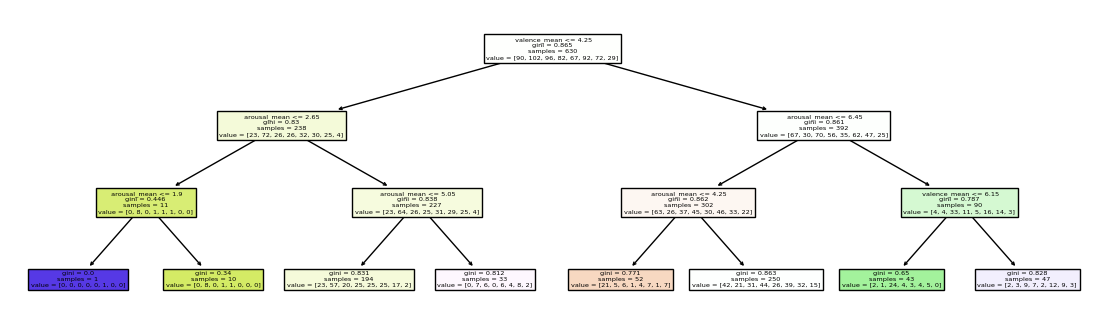

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 4))
plot_tree(decision_tree=model_genre, feature_names=exp.columns, filled=True);

In [23]:
pred_genre = model_genre.predict(X_test_gen)
df_pred_genre = pd.DataFrame(pred_genre, columns=['pred'])
y_test_genre_df = pd.DataFrame(y_test_gen)
dif_genre = pd.concat([y_test_genre_df.reset_index(), df_pred_genre], axis = 1)
dif_genre

,index,Genre,pred
0,158,\tClassical\t,\tClassical\t
1,500,\tJazz\t,\tJazz\t
2,396,\tElectronic\t,\tClassical\t
3,155,\tClassical\t,\tClassical\t
4,321,\tElectronic\t,\tElectronic\t
...,...,...,...
65,549,\tJazz\t,\tElectronic\t
66,211,\tClassical\t,\tPop\t
67,55,\tBlues\t,\tClassical\t
68,135,\tClassical\t,\tClassical\t


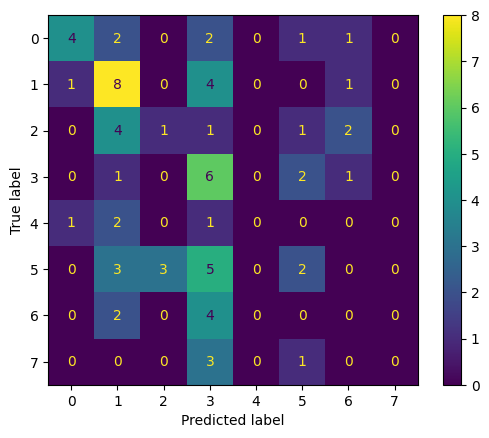

In [28]:
# matriz de confusion
import sklearn.metrics
conf_matrix = sklearn.metrics.confusion_matrix(dif_genre['Genre'], dif_genre['pred'])
conf_matrix_displayed = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix)
conf_matrix_displayed.plot()


In [29]:
sklearn.metrics.accuracy_score(dif_genre['Genre'], dif_genre['pred'])

0.3